In [2]:
#region Basic_Import
## Basic
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.path.dirname(os.path.abspath('__file__'))
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from pandas import DataFrame, Series

import math, random

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

## 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm
import tqdm

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [3]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from keras.models import Sequential, load_model
    from keras_flops import get_flops
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [4]:
## Import_Local
from Src_Dev_Common import Data_Datetime as com_date
# from Src_Dev_Common import DEV_KASI_Holiday as com_Holi
# from Src_Dev_Common import DEV_Common_Data_Analysis as com_Analysis
from Src_Dev_Common import Data_Preprocessing as com_Prep
from Src_Dev_Common import Common_Model as com_Model
# from Src_Dev_Common import DEV_Common_Data_Visualization as com_Visual
# from Src_Dev_Common import DEV_KMA_Weather_ASOS as com_ASOS
# from Src_Dev_Common import DEV_KDHC_Usage as com_KDHC
# from Src_Dev_Common import DEV_KIER_Usage as com_KIER

## Data Load

In [5]:
## Raw Data Load
df_KIER_5Domain = pd.read_csv('KIER_Merged_5domain_2024-07-08.csv', index_col = 0)

data = df_KIER_5Domain.drop(['METER_DATE', 'YEAR'], axis=1)
back_data = df_KIER_5Domain.drop(['YEAR'], axis=1)

print(df_KIER_5Domain.shape, '///', df_KIER_5Domain.columns)
df_KIER_5Domain

(16413, 29) /// Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'HOUR',
       'MINUTE', 'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity',
       'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'ELEC_INST', 'HEAT_INST', 'WATER_INST', 'HOT_INST', 'GAS_INST'],
      dtype='object')


METER_DATE  YEAR  MONTH  DAY  code_day_of_the_week  HOUR  \
0      2022-07-20 13:00:00  2022      7   20                     2    13   
1      2022-07-20 14:00:00  2022      7   20                     2    14   
2      2022-07-20 15:00:00  2022      7   20                     2    15   
3      2022-07-20 16:00:00  2022      7   20                     2    16   
4      2022-07-20 17:00:00  2022      7   20                     2    17   
...                    ...   ...    ...  ...                   ...   ...   
16408  2024-06-03 05:00:00  2024      6    3                     0     5   
16409  2024-06-03 06:00:00  2024      6    3                     0     6   
16410  2024-06-03 07:00:00  2024      6    3                     0     7   
16411  2024-06-03 08:00:00  2024      6    3                     0     8   
16412  2024-06-03 09:00:00  2024      6    3                     0     9   

       MINUTE  temp_outdoor  temp_dew_point   temp_ground  ...     sunshine  \
0           0 29.8000000000   21.4000000000 41.5000000000  ... 1.0000000000   
1           0 30.4000000000   20.0000000000 42.4000000000  ... 1.0000000000   
2           0 30.5000000000   21.0000000000 41.9000000000  ... 0.8000000000   
3           0 30.8000000000   20.7000000000 39.7000000000  ... 1.0000000000   
4           0 29.5000000000   20.0000000000 34.5000000000  ... 0.3000000000   
...       ...           ...             ...           ...  ...          ...   
16408       0 13.1000000000   10.8000000000 14.7000000000  ... 0.0000000000   
16409       0 13.7000000000   10.8000000000 15.0000000000  ... 0.1000000000   
16410       0 18.0000000000   11.9000000000 17.0000000000  ... 1.0000000000   
16411       0 19.7000000000   12.2000000000 22.5000000000  ... 1.0000000000   
16412       0 21.1000000000   12.2000000000 30.2000000000  ... 1.0000000000   

       solar_radiation  cloud_total  cloud_midlow    visual_range  \
0         2.8900000000 8.0000000000  2.0000000000 1903.0000000000   
1         2.8500000000 8.0000000000  1.0000000000 1986.0000000000   
2         2.3800000000 7.0000000000  2.0000000000 1985.0000000000   
3         2.1900000000 5.0000000000  3.0000000000 1993.0000000000   
4         1.0200000000 9.0000000000  1.0000000000 2000.0000000000   
...                ...          ...           ...             ...   
16408     0.0000000000 0.0000000000  0.0000000000 2976.0000000000   
16409     0.0500000000 0.0000000000  0.0000000000 3874.0000000000   
16410     0.5600000000 0.0000000000  0.0000000000 5000.0000000000   
16411     1.2500000000 0.0000000000  0.0000000000 5000.0000000000   
16412     1.9500000000 0.0000000000  0.0000000000 3955.0000000000   

           ELEC_INST    HEAT_INST    WATER_INST     HOT_INST     GAS_INST  
0     194.7787303232 0.0001975346  7.0350500000 0.0000093275 0.0000000000  
1     185.5468089258 0.0001975346  7.0453500000 0.0000031403 0.0003690685  
2     191.8368089258 0.0001975346  6.4400500000 0.0000034357 0.0102684149  
3     185.9038264696 0.0001975346  7.4170000000 0.0000072374 0.0218035922  
4     189.2517825136 0.0001975346 10.2510000000 0.0000123613 0.0218035922  
...              ...          ...           ...          ...          ...  
16408  80.6379999998 0.0000000000  6.0601202899 0.0000305033 0.0000000000  
16409  85.4079999998 0.0000000000  8.2929202899 0.0000944223 0.1200000000  
16410 111.6829999997 0.0000000000 11.7601202899 0.0002607810 0.3600000000  
16411 121.9929999998 0.0000000000  9.9387202899 0.0000540724 0.3800000000  
16412 122.4830000000 0.0000000000  6.3371202899 0.0000063394 0.3800000000  

[16413 rows x 29 columns]

##  For Scaling

In [6]:
scaler_data = MinMaxScaler()
scaler_data.fit(data)
scaled_data = scaler_data.transform(data)

new_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

## Input/Target 분리
elec_heat_X = new_data.drop(['WATER_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
elec_heat_Y = new_data[['ELEC_INST','HEAT_INST']].iloc[1:,]

elec_water_X = new_data.drop(['HEAT_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
elec_water_Y = new_data[['ELEC_INST','WATER_INST']].iloc[1:,]

elec_hot_X = new_data.drop(['HEAT_INST', 'WATER_INST', 'GAS_INST'], axis=1).iloc[:-1,]
elec_hot_Y = new_data[['ELEC_INST','HOT_INST']].iloc[1:,]

elec_gas_X = new_data.drop(['HEAT_INST', 'WATER_INST', 'HOT_INST'], axis=1).iloc[:-1,]
elec_gas_Y = new_data[['ELEC_INST','GAS_INST']].iloc[1:,]

heat_water_X = new_data.drop(['ELEC_INST', 'HOT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
heat_water_Y = new_data[['HEAT_INST','WATER_INST']].iloc[1:,]

heat_hot_X = new_data.drop(['ELEC_INST', 'WATER_INST', 'GAS_INST'], axis=1).iloc[:-1,]
heat_hot_Y = new_data[['HEAT_INST','HOT_INST']].iloc[1:,]

heat_gas_X = new_data.drop(['ELEC_INST', 'WATER_INST', 'HOT_INST'], axis=1).iloc[:-1,]
heat_gas_Y = new_data[['HOT_INST','GAS_INST']].iloc[1:,]

water_hot_X = new_data.drop(['ELEC_INST', 'HEAT_INST', 'GAS_INST'], axis=1).iloc[:-1,]
water_hot_Y = new_data[['WATER_INST', 'HOT_INST']].iloc[1:,]

water_gas_X = new_data.drop(['ELEC_INST', 'HEAT_INST', 'HOT_INST'], axis=1).iloc[:-1,]
water_gas_Y = new_data[['WATER_INST', 'GAS_INST']].iloc[1:,]

hot_gas_X = new_data.drop(['ELEC_INST', 'HEAT_INST', 'WATER_INST'], axis=1).iloc[:-1,]
hot_gas_Y = new_data[['HOT_INST','GAS_INST']].iloc[1:,]

## Train/Test 분리
trainX_elec_heat, testX_elec_heat, trainY_elec_heat, testY_elec_heat = train_test_split(elec_heat_X, elec_heat_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_elec_water, testX_elec_water, trainY_elec_water, testY_elec_water = train_test_split(elec_water_X, elec_water_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_elec_hot, testX_elec_hot, trainY_elec_hot, testY_elec_hot = train_test_split(elec_hot_X, elec_hot_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_elec_gas, testX_elec_gas, trainY_elec_gas, testY_elec_gas = train_test_split(elec_gas_X, elec_gas_Y, test_size=0.3, shuffle=False, random_state=0)

trainX_heat_water, testX_heat_water, trainY_heat_water, testY_heat_water = train_test_split(heat_water_X, heat_water_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_heat_hot, testX_heat_hot, trainY_heat_hot, testY_heat_hot = train_test_split(heat_hot_X, heat_hot_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_heat_gas, testX_heat_gas, trainY_heat_gas, testY_heat_gas = train_test_split(heat_gas_X, heat_gas_Y, test_size=0.3, shuffle=False, random_state=0)

trainX_water_hot, testX_water_hot, trainY_water_hot, testY_water_hot = train_test_split(water_hot_X, water_hot_Y, test_size=0.3, shuffle=False, random_state=0)
trainX_water_gas, testX_water_gas, trainY_water_gas, testY_water_gas = train_test_split(water_gas_X, water_gas_Y, test_size=0.3, shuffle=False, random_state=0)

trainX_hot_gas, testX_hot_gas, trainY_hot_gas, testY_hot_gas = train_test_split(hot_gas_X, hot_gas_Y, test_size=0.3, shuffle=False, random_state=0)

In [7]:
def buildDataSet(input, target, seqLength):
    xdata = []
    ydata = []
    for i in range(len(input) - seqLength):
        tx = input.iloc[i:i+seqLength]
        ty = target.iloc[i+seqLength-1]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)

In [8]:
trainx_elec_heat, trainy_elec_heat = buildDataSet(trainX_elec_heat, trainY_elec_heat, 24)
testx_elec_heat, testy_elec_heat = buildDataSet(testX_elec_heat, testY_elec_heat, 24)

trainx_elec_water, trainy_elec_water = buildDataSet(trainX_elec_water, trainY_elec_water, 24)
testx_elec_water, testy_elec_water = buildDataSet(testX_elec_water, testY_elec_water, 24)

trainx_elec_hot, trainy_elec_hot = buildDataSet(trainX_elec_hot, trainY_elec_hot, 24)
testx_elec_hot, testy_elec_hot = buildDataSet(testX_elec_hot, testY_elec_hot, 24)

trainx_elec_gas, trainy_elec_gas = buildDataSet(trainX_elec_gas, trainY_elec_gas, 24)
testx_elec_gas, testy_elec_gas = buildDataSet(testX_elec_gas, testY_elec_gas, 24)

trainx_heat_water, trainy_heat_water = buildDataSet(trainX_heat_water, trainY_heat_water, 24)
testx_heat_water, testy_heat_water = buildDataSet(testX_heat_water, testY_heat_water, 24)

trainx_heat_hot, trainy_heat_hot = buildDataSet(trainX_heat_hot, trainY_heat_hot, 24)
testx_heat_hot, testy_heat_hot = buildDataSet(testX_heat_hot, testY_heat_hot, 24)

trainx_heat_gas, trainy_heat_gas = buildDataSet(trainX_heat_gas, trainY_heat_gas, 24)
testx_heat_gas, testy_heat_gas = buildDataSet(testX_heat_gas, testY_heat_gas, 24)

trainx_water_hot, trainy_water_hot = buildDataSet(trainX_water_hot, trainY_water_hot, 24)
testx_water_hot, testy_water_hot = buildDataSet(testX_water_hot, testY_water_hot, 24)

trainx_water_gas, trainy_water_gas = buildDataSet(trainX_water_gas, trainY_water_gas, 24)
testx_water_gas, testy_water_gas = buildDataSet(testX_water_gas, testY_water_gas, 24)

trainx_hot_gas, trainy_hot_gas = buildDataSet(trainX_hot_gas, trainY_hot_gas, 24)
testx_hot_gas, testy_hot_gas = buildDataSet(testX_hot_gas, testY_hot_gas, 24)

In [9]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)
    #conv3 = tf.keras.layers.Conv1D(32, 1, activation='swish')(pool2) #
    #pool3 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv3)#

    # 인코더 - 디코더 선언
    #encoder_lstm1 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    #decoder_lstm3 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #

    # 인코더
    #encoder_output_lstm1 = encoder_lstm1(pool3) #
    encoder_output_lstm2 = encoder_lstm2(pool2)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)
    #decoder_lstm3_output = decoder_lstm3(decoder_lstm2_output) #

    flatten = tf.keras.layers.Flatten()(decoder_lstm2_output)
    model_output = tf.keras.layers.Dense(2)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)

    model.summary()
    
    return model

In [ ]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)

    # 인코더 - 디코더 선언
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')

    # 인코더
    encoder_output_lstm2 = encoder_lstm2(pool2)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)

    flatten = tf.keras.layers.Flatten()(decoder_lstm2_output)
    model_output = tf.keras.layers.Dense(2)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)

    model.summary()
    
    return model



In [10]:
model_elec_heat = seq2seq_model(input_shape=(24, 24))
model_elec_water = seq2seq_model(input_shape=(24, 24))
model_elec_hot = seq2seq_model(input_shape=(24, 24))
model_elec_gas = seq2seq_model(input_shape=(24, 24))

model_heat_water = seq2seq_model(input_shape=(24, 24))
model_heat_hot = seq2seq_model(input_shape=(24, 24))
model_heat_gas = seq2seq_model(input_shape=(24, 24))

model_water_hot = seq2seq_model(input_shape=(24, 24))
model_water_gas = seq2seq_model(input_shape=(24, 24))

model_hot_gas = seq2seq_model(input_shape=(24, 24))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 24)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 24, 128)      3200        ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 24, 128)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 24, 64)       8256        ['max_pooling1d[0][0]']          
                                                                                              

In [11]:
## elec / heat
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_elec_heat_multi.h5')
model_elec_heat.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_elec_heat = model_elec_heat.fit(trainx_elec_heat, trainy_elec_heat, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_elec_heat = load_model('s2s_elec_heat_multi.h5')

## elec / water
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_elec_water_multi.h5')
model_elec_water.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_elec_water = model_elec_water.fit(trainx_elec_water, trainy_elec_water, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_elec_water = load_model('s2s_elec_water_multi.h5')

## elec / hot
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_elec_hot_multi.h5')
model_elec_hot.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_elec_hot = model_elec_hot.fit(trainx_elec_hot, trainy_elec_hot, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_elec_hot = load_model('s2s_elec_hot_multi.h5')

## elec / gas
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_elec_gas_multi.h5')
model_elec_gas.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_elec_gas = model_elec_gas.fit(trainx_elec_gas, trainy_elec_gas, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_elec_gas = load_model('s2s_elec_gas_multi.h5')

Epoch 1/300
45/45 [==============================] - 8s 15ms/step - loss: 0.0939 - mse: 0.0247
Epoch 2/300
45/45 [==============================] - 3s 72ms/step - loss: 0.0757 - mse: 0.0139
Epoch 3/300
45/45 [==============================] - 3s 72ms/step - loss: 0.0571 - mse: 0.0072
Epoch 4/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0523 - mse: 0.0061
Epoch 5/300
45/45 [==============================] - 3s 73ms/step - loss: 0.0504 - mse: 0.0057
Epoch 6/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0486 - mse: 0.0053
Epoch 7/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0468 - mse: 0.0050
Epoch 8/300
45/45 [==============================] - 3s 76ms/step - loss: 0.0449 - mse: 0.0046
Epoch 9/300
45/45 [==============================] - 5s 103ms/step - loss: 0.0431 - mse: 0.0042
Epoch 10/300
45/45 [==============================] - 9s 197ms/step - loss: 0.0409 - mse: 0.0038
Epoch 11/300
45/45 [===========================

KeyboardInterrupt: 

In [ ]:
## heat / water
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_heat_water_multi.h5')
model_heat_water.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_heat_water = model_heat_water.fit(trainx_heat_water, trainy_heat_water, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_heat_water = load_model('s2s_heat_water_multi.h5')

## heat / hot
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_heat_hot_multi.h5')
model_heat_hot.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_heat_hot = model_heat_hot.fit(trainx_heat_hot, trainy_heat_hot, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_heat_hot = load_model('s2s_heat_hot_multi.h5')

## heat / gas
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_heat_gas_multi.h5')
model_heat_gas.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_heat_gas = model_heat_gas.fit(trainx_heat_gas, trainy_heat_gas, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_heat_gas = load_model('s2s_heat_gas_multi.h5')

Epoch 1/300
45/45 [==============================] - 3s 22ms/step - loss: 0.0600 - mse: 0.0139
Epoch 2/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0425 - mse: 0.0048
Epoch 3/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0348 - mse: 0.0030
Epoch 4/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0327 - mse: 0.0027
Epoch 5/300
45/45 [==============================] - 1s 19ms/step - loss: 0.0316 - mse: 0.0025
Epoch 6/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0306 - mse: 0.0024
Epoch 7/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0299 - mse: 0.0023
Epoch 8/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0293 - mse: 0.0022
Epoch 9/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0290 - mse: 0.0021
Epoch 10/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0280 - mse: 0.0020
Epoch 11/300
45/45 [=============================

In [ ]:
## water / hot
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_water_hot_multi.h5')
model_water_hot.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_water_hot = model_water_hot.fit(trainx_water_hot, trainy_water_hot, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_water_hot = load_model('s2s_water_hot_multi.h5')

## water / gas
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_water_gas_multi.h5')
model_water_gas.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_water_gas = model_water_gas.fit(trainx_water_gas, trainy_water_gas, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_water_gas = load_model('s2s_water_gas_multi.h5')

Epoch 1/300
45/45 [==============================] - 3s 21ms/step - loss: 0.0563 - mse: 0.0087
Epoch 2/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0504 - mse: 0.0073
Epoch 3/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0494 - mse: 0.0070
Epoch 4/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0486 - mse: 0.0068
Epoch 5/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0479 - mse: 0.0066
Epoch 6/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0468 - mse: 0.0064
Epoch 7/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0451 - mse: 0.0061
Epoch 8/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0425 - mse: 0.0056
Epoch 9/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0394 - mse: 0.0050
Epoch 10/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0377 - mse: 0.0046
Epoch 11/300
45/45 [=============================

In [ ]:
## hot / gas
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_hot_gas_multi.h5')
model_hot_gas.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_hot_gas = model_hot_gas.fit(trainx_hot_gas, trainy_hot_gas, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])
model_hot_gas = load_model('s2s_hot_gas_multi.h5')

Epoch 1/300
45/45 [==============================] - 3s 21ms/step - loss: 0.0809 - mse: 0.0152
Epoch 2/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0648 - mse: 0.0107
Epoch 3/300
45/45 [==============================] - 1s 19ms/step - loss: 0.0627 - mse: 0.0101
Epoch 4/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0612 - mse: 0.0098
Epoch 5/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0599 - mse: 0.0094
Epoch 6/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0594 - mse: 0.0093
Epoch 7/300
45/45 [==============================] - 1s 19ms/step - loss: 0.0589 - mse: 0.0091
Epoch 8/300
45/45 [==============================] - 1s 19ms/step - loss: 0.0585 - mse: 0.0090
Epoch 9/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0582 - mse: 0.0090
Epoch 10/300
45/45 [==============================] - 1s 18ms/step - loss: 0.0579 - mse: 0.0089
Epoch 11/300
45/45 [=============================

In [ ]:
# 정규화 되돌리기 함수 
def back_MinMax(data, value):
    diff = np.max(data, axis=0)-np.min(data, axis=0)
    back = value * diff + np.min(data, axis=0)
    return back 

In [ ]:
## 평가지표
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def mean_bias_error(true, pred):
    mbe_loss = np.sum(true - pred)/true.size
    return mbe_loss

154/154 [==============================] - 1s 6ms/step
MAE  :  1.4324
MAPE :  0.159
MSE  :  3.4721
RMSE :  1.8634
MBE :  0.4788
R2   :  0.9082


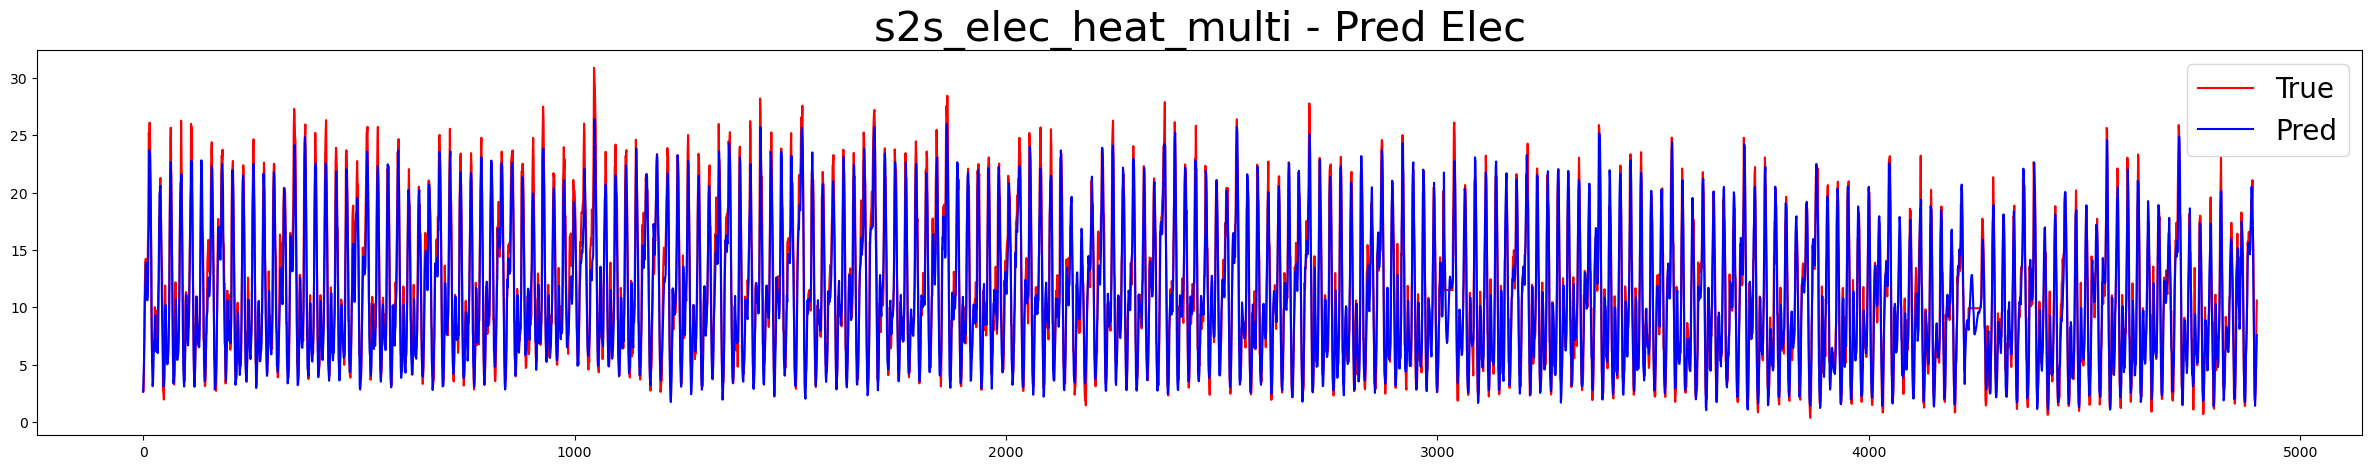

MAE  :  0.0
MAPE :  8715.8603
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.8668


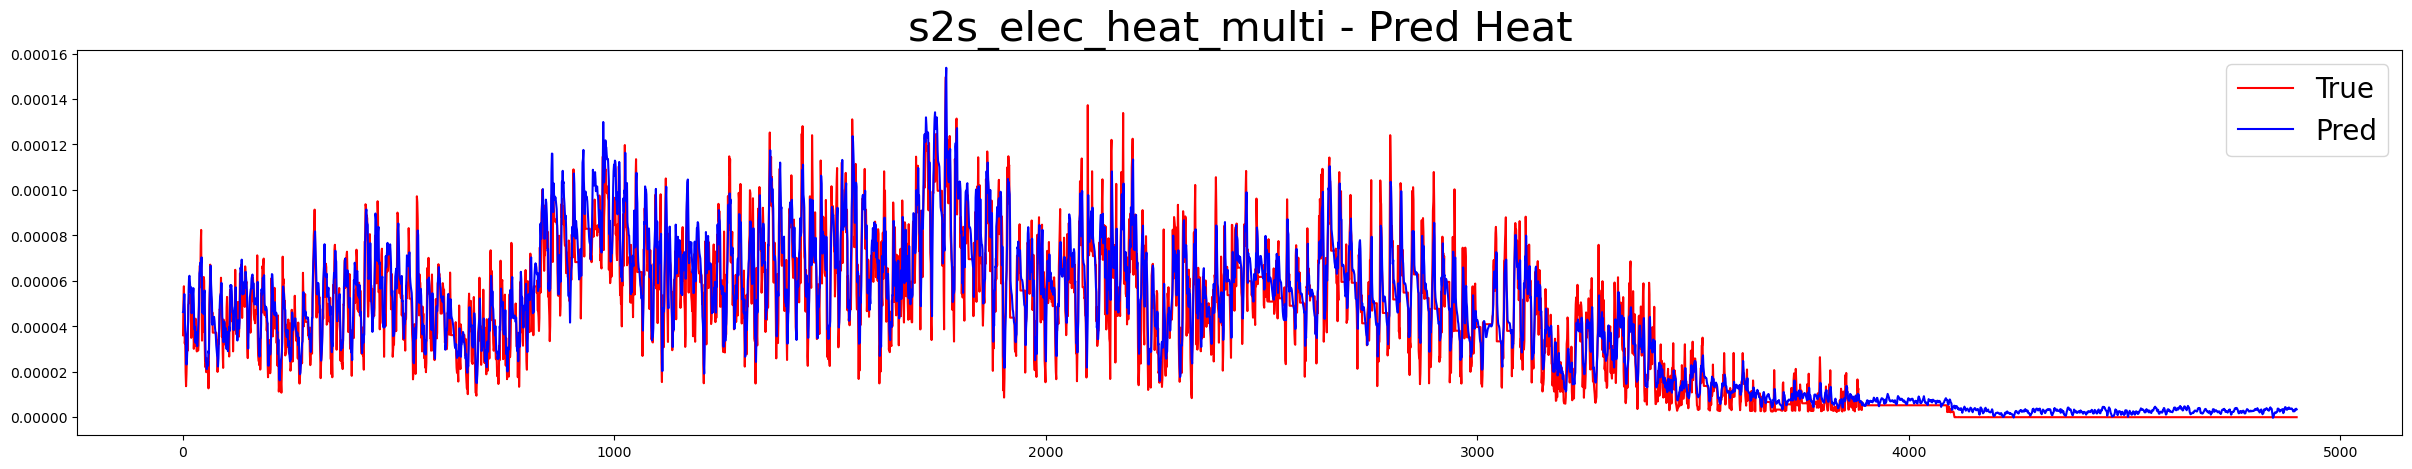

In [ ]:
## Case 02-01 : 2 Domain Multivariate, ELEC/HEAT
pred_elec = back_MinMax(back_data.to_numpy()[:, [-3]], model_elec_heat.predict(testx_elec_heat)[:,0])
real_elec = back_MinMax(back_data.to_numpy()[:, [-3]], testy_elec_heat[:,0])

pred_heat = back_MinMax(back_data.to_numpy()[:, [-2]], model_elec_heat.predict(testx_elec_heat)[:,1])
real_heat = back_MinMax(back_data.to_numpy()[:, [-2]], testy_elec_heat[:,1])

str_model = 's2s_elec_heat_multi'
com_Model.model_sk_metrics(real_elec, pred_elec)
com_Model.model_visualization(real_elec, pred_elec, str_model + ' - Pred Elec')

com_Model.model_sk_metrics(real_heat, pred_heat)
com_Model.model_visualization(real_heat, pred_heat, str_model + ' - Pred Heat')

154/154 [==============================] - 1s 6ms/step
MAE  :  1.2135
MAPE :  0.141
MSE  :  2.4676
RMSE :  1.5708
MBE :  -0.1118
R2   :  0.9347


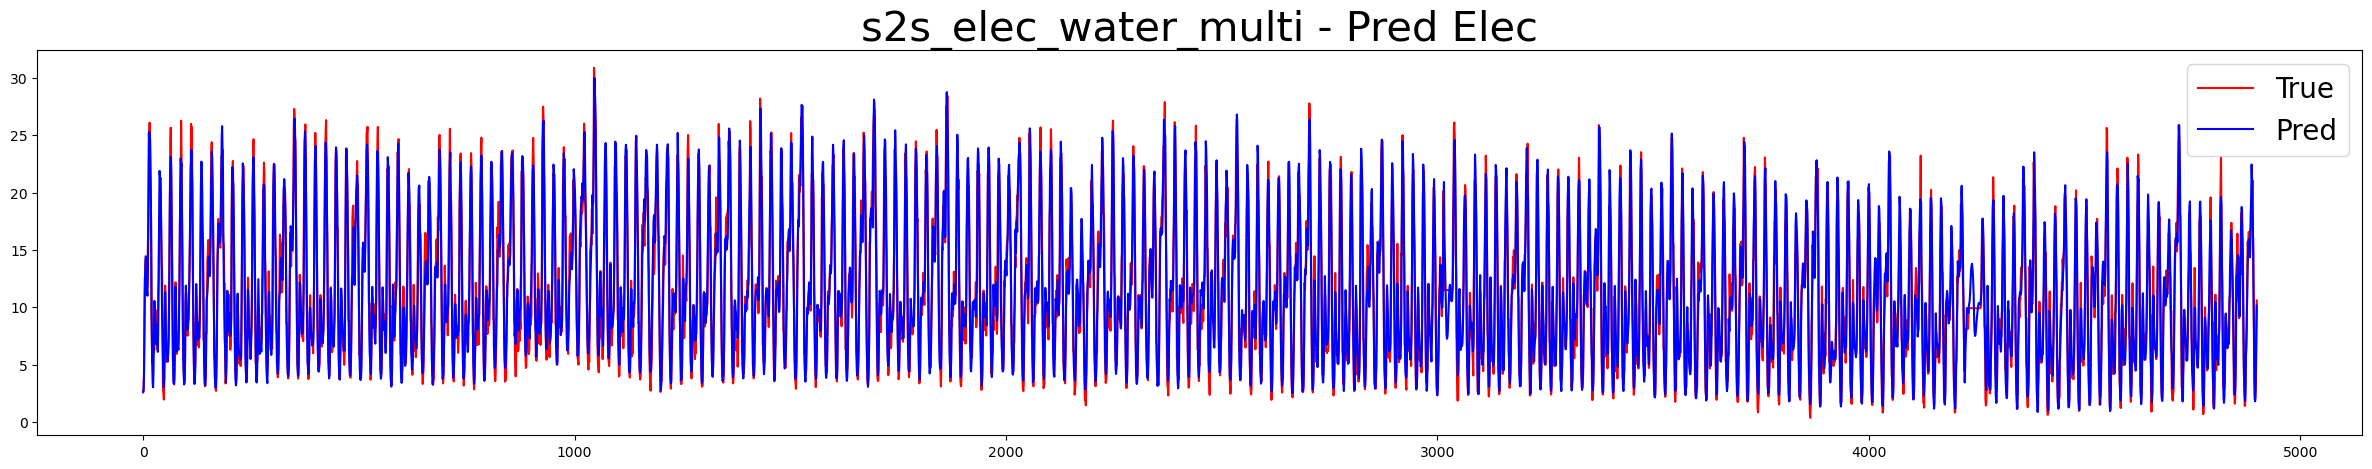

MAE  :  0.0304
MAPE :  0.1655
MSE  :  0.0017
RMSE :  0.0409
MBE :  0.0043
R2   :  0.8675


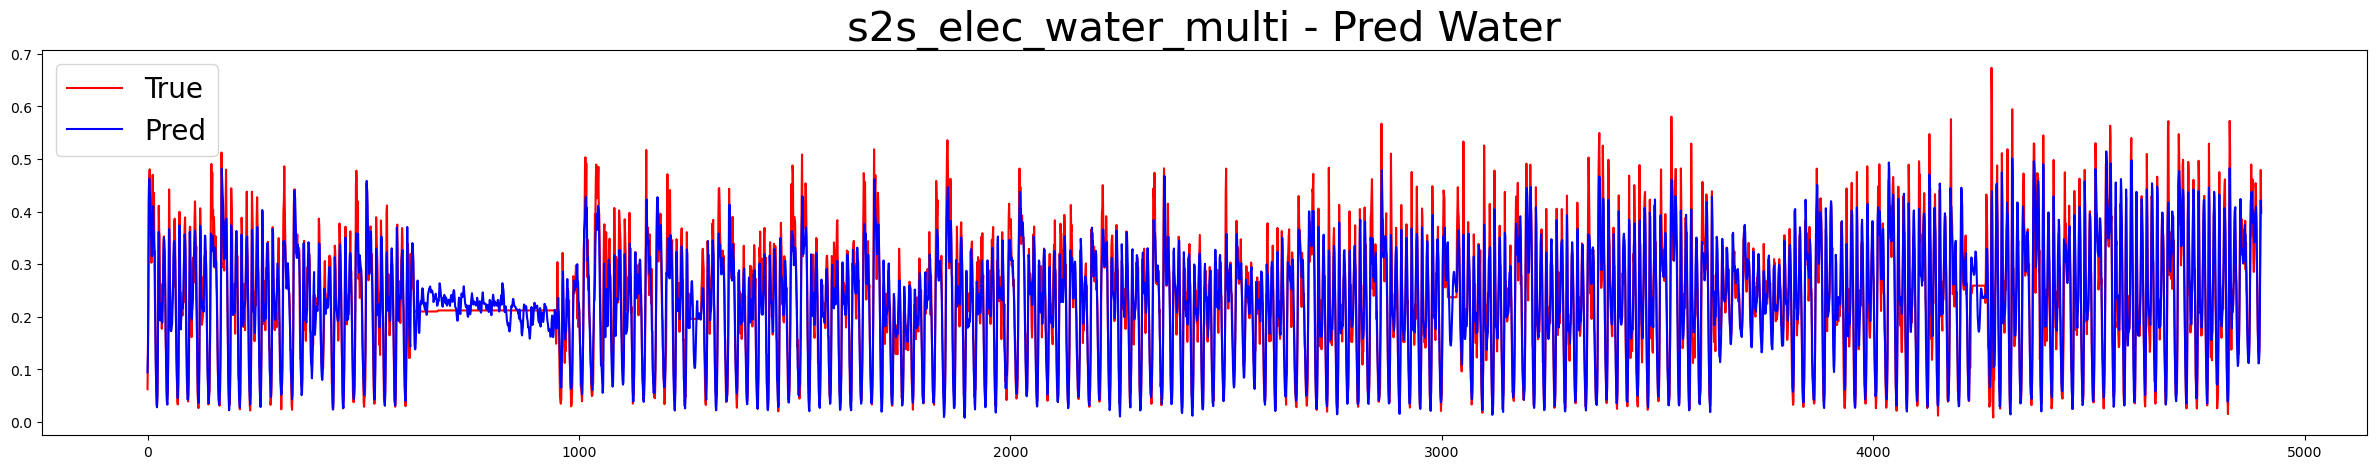

In [ ]:
## Case 02-02 : 2 Domain Multivariate, ELEC/WATER
pred_elec = back_MinMax(back_data.to_numpy()[:, [-3]], model_elec_water.predict(testx_elec_water)[:,0])
real_elec = back_MinMax(back_data.to_numpy()[:, [-3]], testy_elec_water[:,0])

pred_water = back_MinMax(back_data.to_numpy()[:, [-1]], model_elec_water.predict(testx_elec_water)[:,1])
real_water = back_MinMax(back_data.to_numpy()[:, [-1]], testy_elec_water[:,1])

str_model = 's2s_elec_water_multi'
com_Model.model_sk_metrics(real_elec, pred_elec)
com_Model.model_visualization(real_elec, pred_elec, str_model + ' - Pred Elec')

com_Model.model_sk_metrics(real_water, pred_water)
com_Model.model_visualization(real_water, pred_water, str_model + ' - Pred Water')

154/154 [==============================] - 1s 6ms/step
MAE  :  1.2729
MAPE :  0.1514
MSE  :  2.6816
RMSE :  1.6375
MBE :  -0.0519
R2   :  0.9291


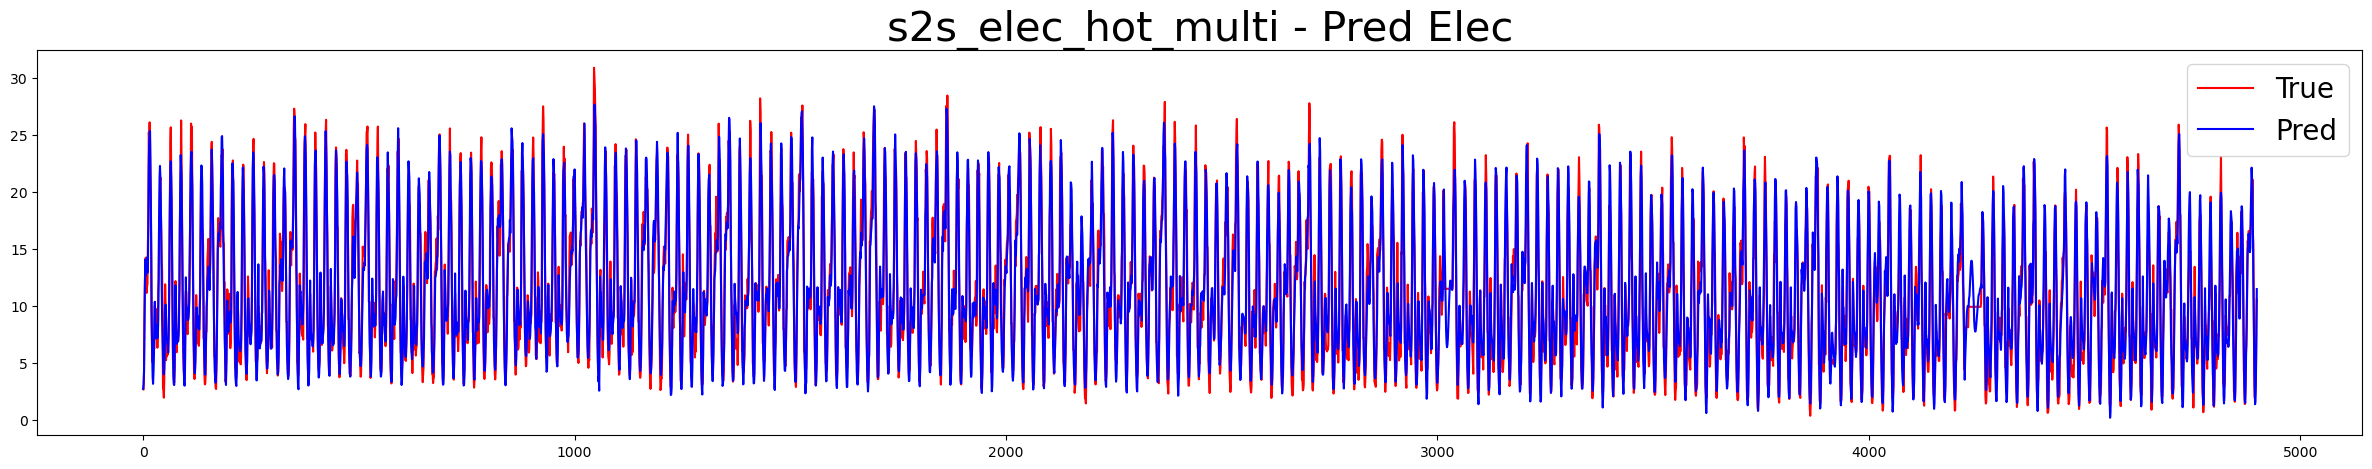

MAE  :  0.1388
MAPE :  1.247
MSE  :  0.048
RMSE :  0.219
MBE :  0.0312
R2   :  0.7208


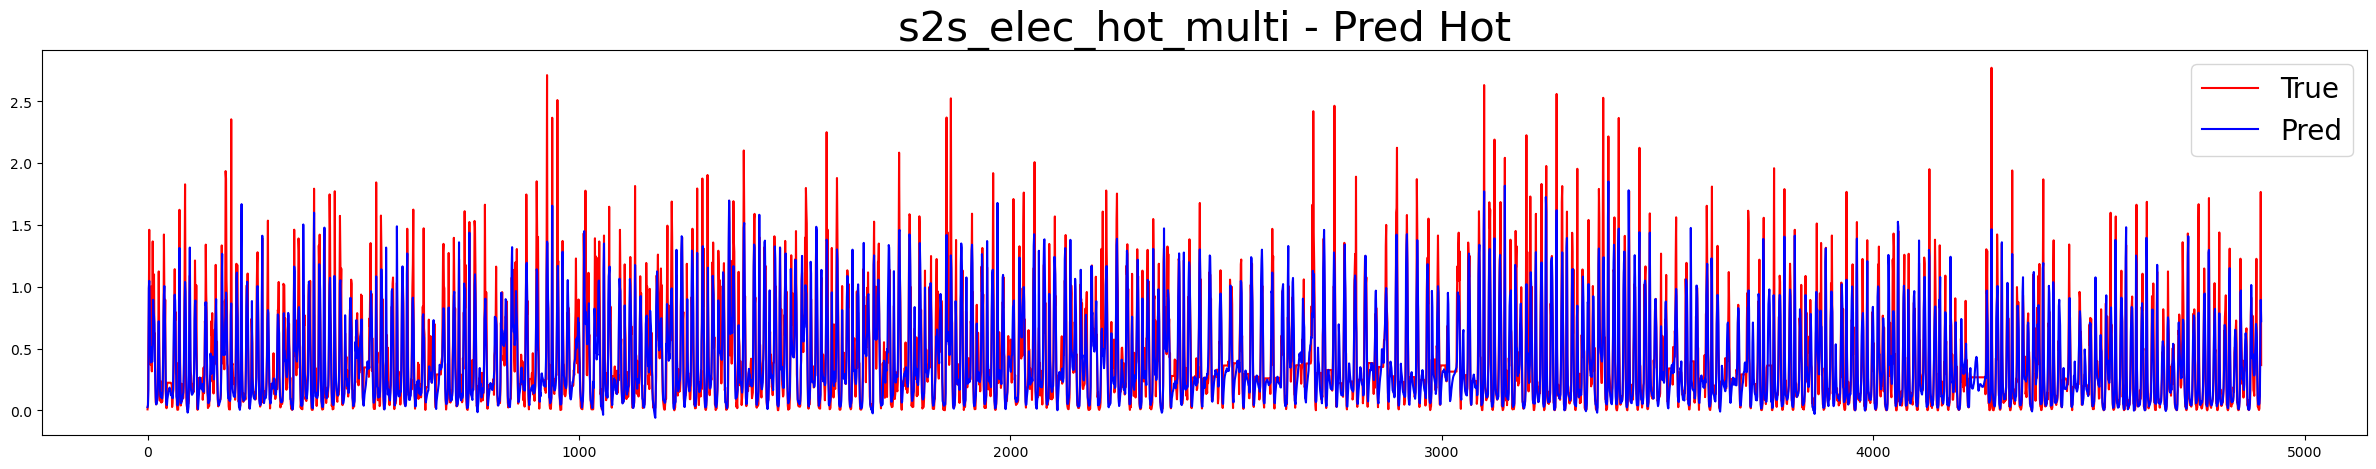

In [ ]:
## Case 02-03 : 2 Domain Multivariate, ELEC/HOT
pred_elec = back_MinMax(back_data.to_numpy()[:, [-3]], model_elec_hot.predict(testx_elec_hot)[:,0])
real_elec = back_MinMax(back_data.to_numpy()[:, [-3]], testy_elec_hot[:,0])

pred_hot = back_MinMax(back_data.to_numpy()[:, [-1]], model_elec_hot.predict(testx_elec_hot)[:,1])
real_hot = back_MinMax(back_data.to_numpy()[:, [-1]], testy_elec_hot[:,1])

str_model = 's2s_elec_hot_multi'
com_Model.model_sk_metrics(real_elec, pred_elec)
com_Model.model_visualization(real_elec, pred_elec, str_model + ' - Pred Elec')

com_Model.model_sk_metrics(real_hot, pred_hot)
com_Model.model_visualization(real_hot, pred_hot, str_model + ' - Pred Hot')

#------------------------------------------------------------------------------------------------
# pred_hot = back_MinMax(back_data.to_numpy()[:, [-2]], model_hot_water.predict(testx_hot_water)[:,0])
# real_hot = back_MinMax(back_data.to_numpy()[:, [-2]], testy_hot_water[:,0])

# pred_water = back_MinMax(back_data.to_numpy()[:, [-1]], model_hot_water.predict(testx_hot_water)[:,1])
# real_water = back_MinMax(back_data.to_numpy()[:, [-1]], testy_hot_water[:,1])

#------------------------------------------------------------------------------------------------
# pred = back_MinMax(back_data.to_numpy()[:, [-3]], model_hot_water.predict(testx_elec_water)[:,0])
# real = back_MinMax(back_data.to_numpy()[:, [-3]], testy_elec_water[:,0])

154/154 [==============================] - 1s 6ms/step
MAE  :  1.3327
MAPE :  0.1524
MSE  :  2.9954
RMSE :  1.7307
MBE :  0.377
R2   :  0.9208


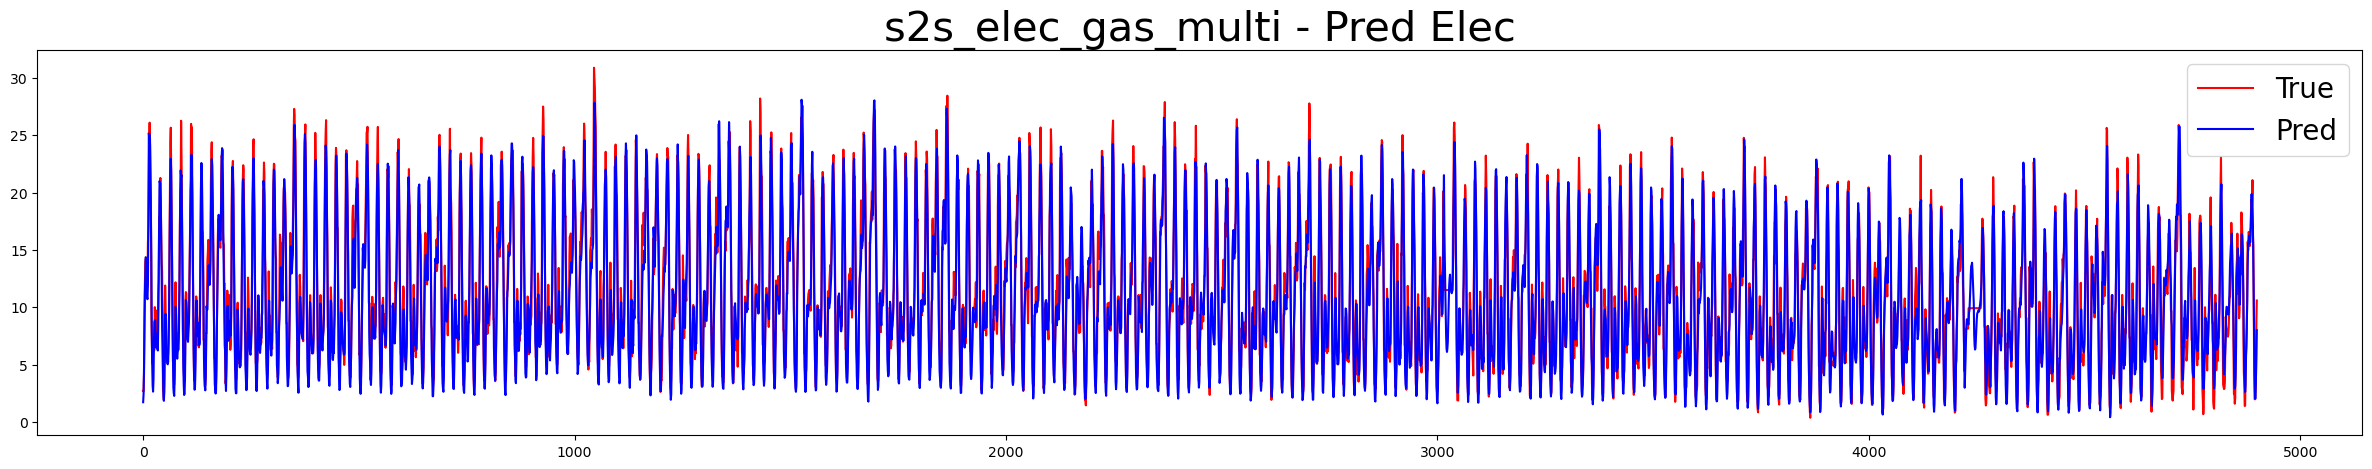

MAE  :  0.1463
MAPE :  9465759853450.516
MSE  :  0.0377
RMSE :  0.1942
MBE :  -0.0519
R2   :  0.498


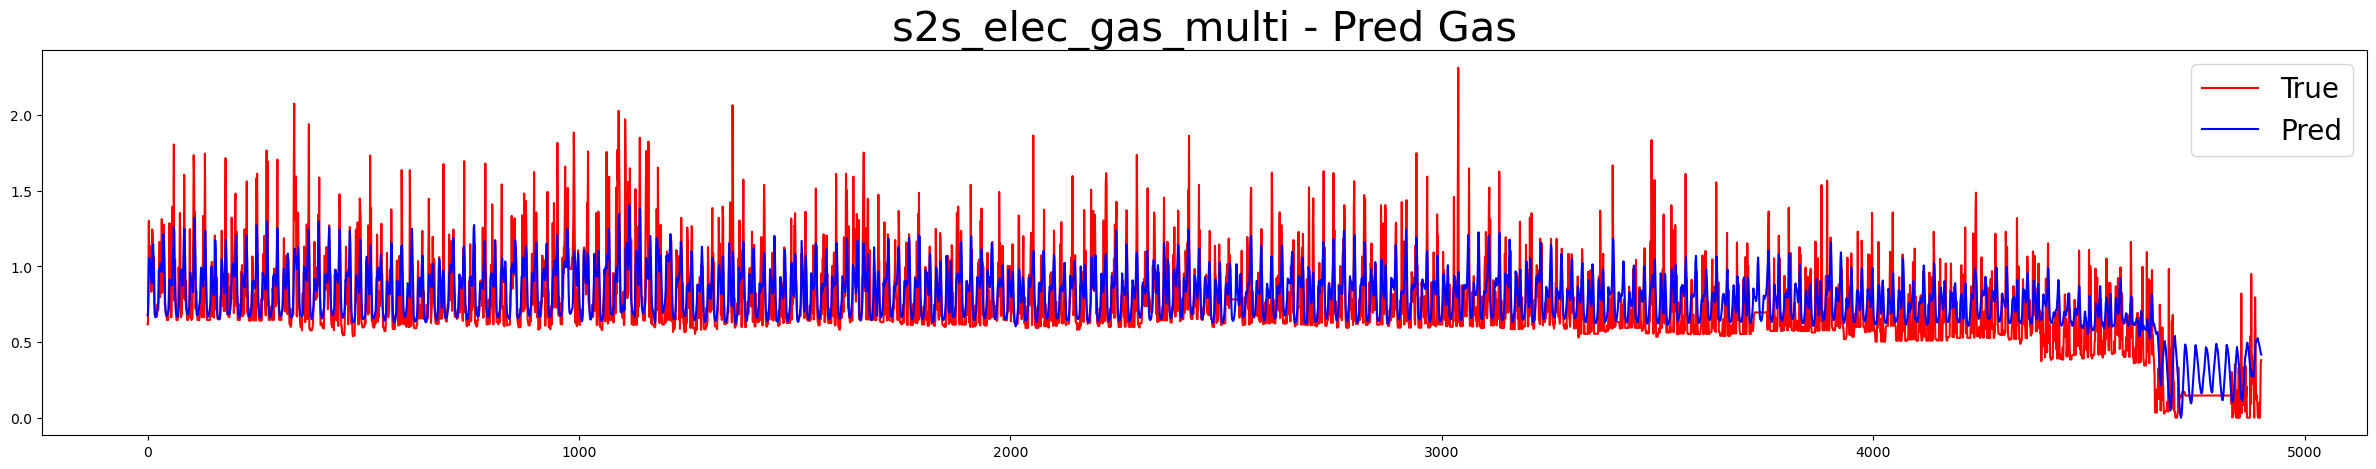

In [ ]:
## Case 02-04 : 2 Domain Multivariate, ELEC/GAS
pred_elec = back_MinMax(back_data.to_numpy()[:, [-3]], model_elec_gas.predict(testx_elec_gas)[:,0])
real_elec = back_MinMax(back_data.to_numpy()[:, [-3]], testy_elec_gas[:,0])

pred_gas = back_MinMax(back_data.to_numpy()[:, [-1]], model_elec_gas.predict(testx_elec_gas)[:,1])
real_gas = back_MinMax(back_data.to_numpy()[:, [-1]], testy_elec_gas[:,1])

str_model = 's2s_elec_gas_multi'
com_Model.model_sk_metrics(real_elec, pred_elec)
com_Model.model_visualization(real_elec, pred_elec, str_model + ' - Pred Elec')

com_Model.model_sk_metrics(real_gas, pred_gas)
com_Model.model_visualization(real_gas, pred_gas, str_model + ' - Pred Gas')

154/154 [==============================] - 1s 6ms/step
MAE  :  1.3117
MAPE :  0.3582
MSE  :  3.4809
RMSE :  1.8657
MBE :  -0.4617
R2   :  0.861


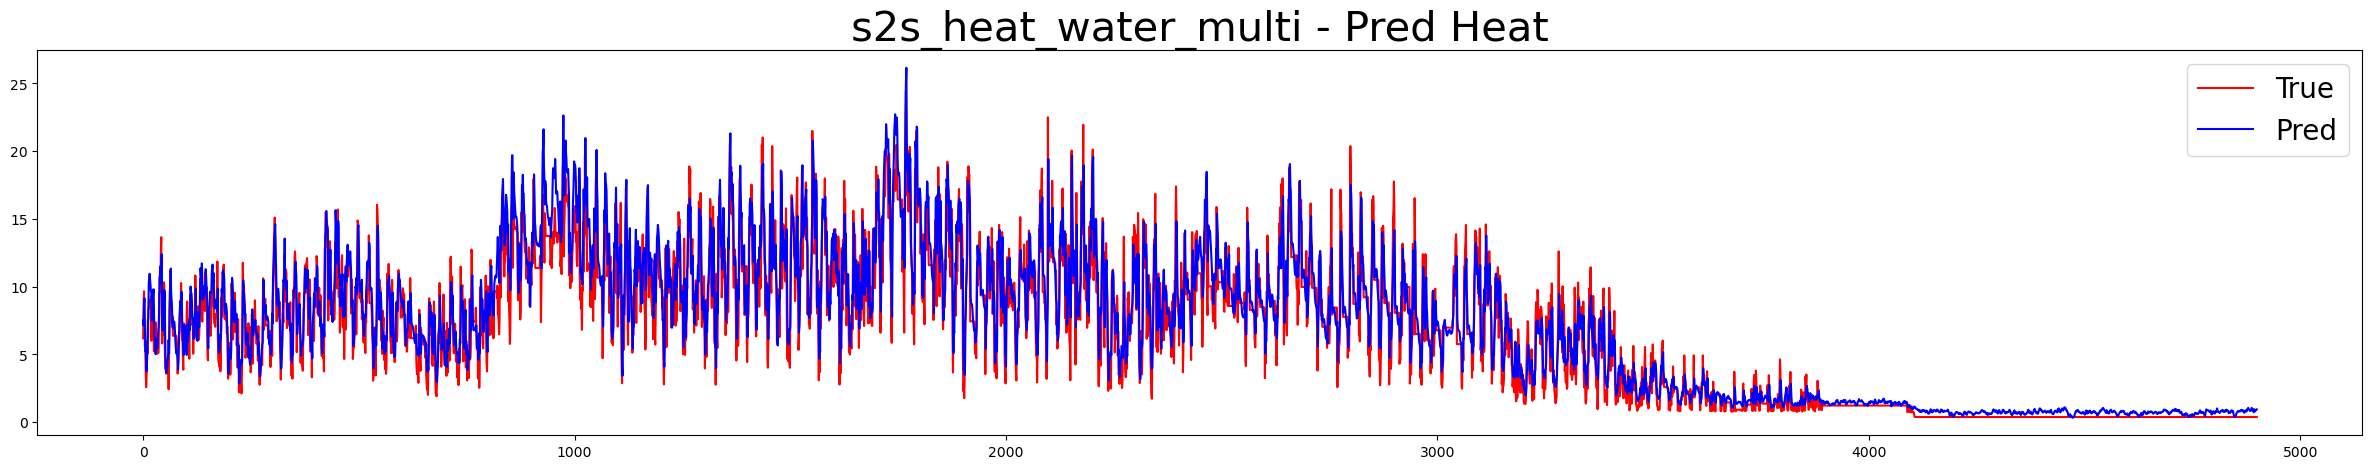

MAE  :  0.0334
MAPE :  0.1846
MSE  :  0.002
RMSE :  0.0451
MBE :  0.0096
R2   :  0.8394


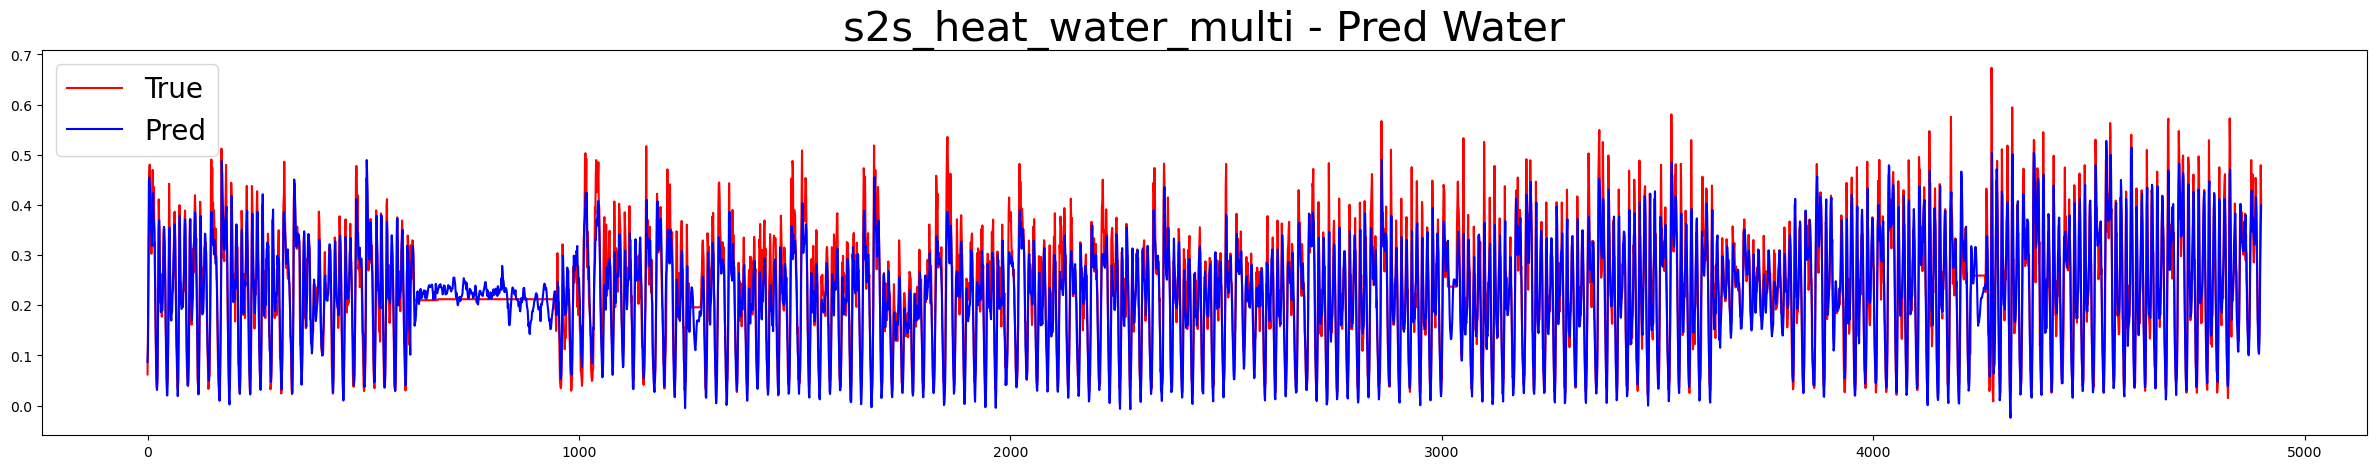

In [ ]:
## Case 02-05 : 2 Domain Multivariate, HEAT/WATER
pred_heat = back_MinMax(back_data.to_numpy()[:, [-3]], model_heat_water.predict(testx_heat_water)[:,0])
real_heat = back_MinMax(back_data.to_numpy()[:, [-3]], testy_heat_water[:,0])

pred_water = back_MinMax(back_data.to_numpy()[:, [-1]], model_heat_water.predict(testx_heat_water)[:,1])
real_water = back_MinMax(back_data.to_numpy()[:, [-1]], testy_heat_water[:,1])

str_model = 's2s_heat_water_multi'
com_Model.model_sk_metrics(real_heat, pred_heat)
com_Model.model_visualization(real_heat, pred_heat, str_model + ' - Pred Heat')

com_Model.model_sk_metrics(real_water, pred_water)
com_Model.model_visualization(real_water, pred_water, str_model + ' - Pred Water')

154/154 [==============================] - 1s 6ms/step
MAE  :  1.2982
MAPE :  0.3877
MSE  :  3.4639
RMSE :  1.8612
MBE :  -0.1135
R2   :  0.8617


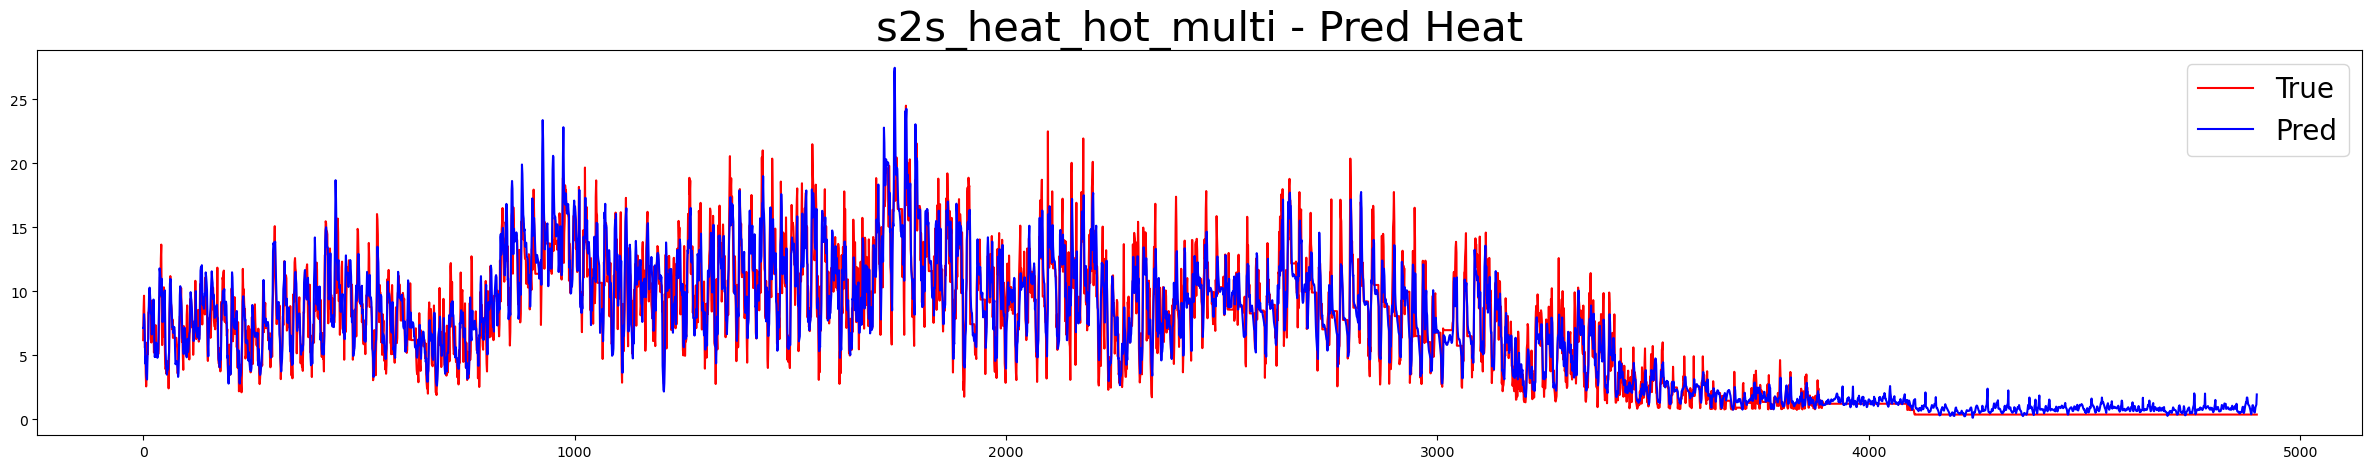

MAE  :  0.1498
MAPE :  1.2263
MSE  :  0.0584
RMSE :  0.2416
MBE :  0.0513
R2   :  0.6601


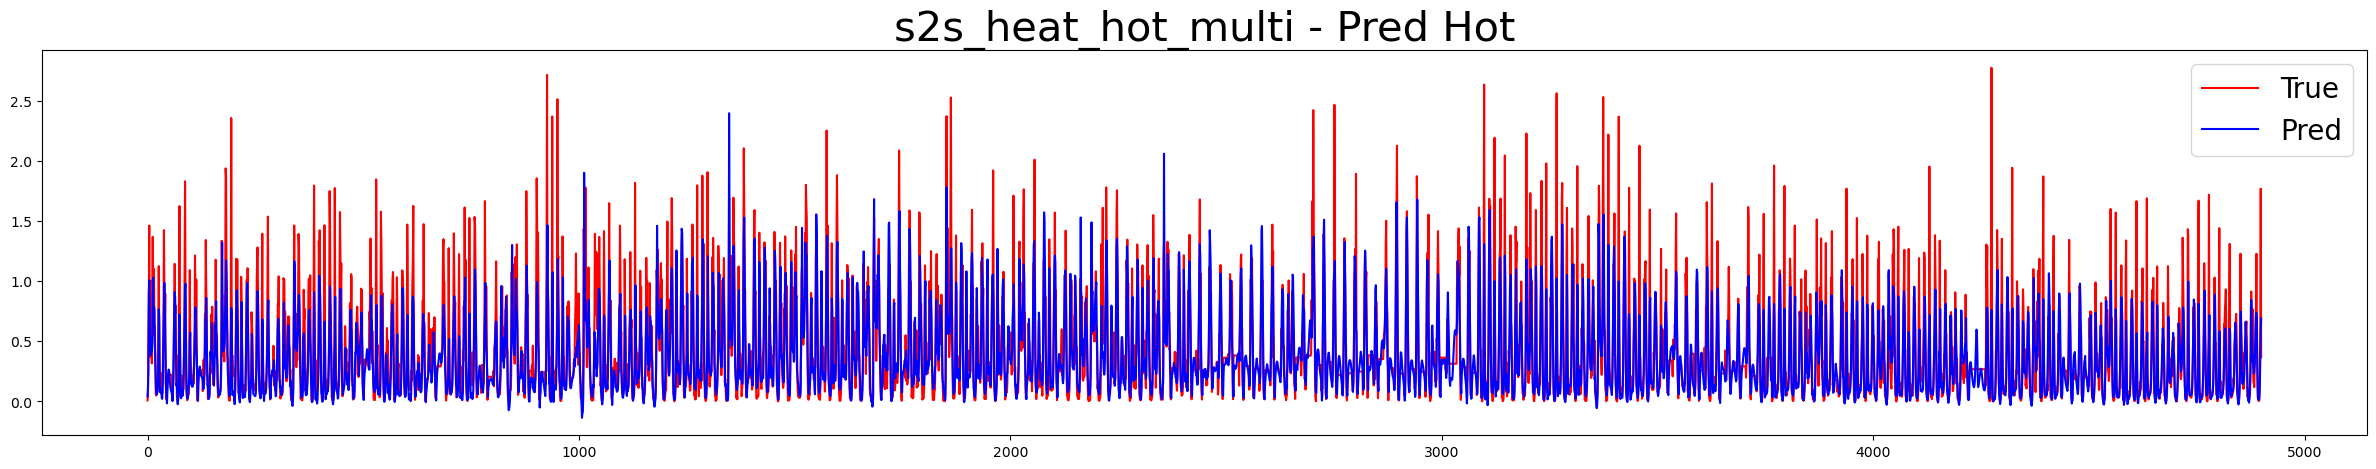

In [ ]:
## Case 02-06 : 2 Domain Multivariate, HEAT/HOT
pred_heat = back_MinMax(back_data.to_numpy()[:, [-3]], model_heat_hot.predict(testx_heat_hot)[:,0])
real_heat = back_MinMax(back_data.to_numpy()[:, [-3]], testy_heat_hot[:,0])

pred_hot = back_MinMax(back_data.to_numpy()[:, [-1]], model_heat_hot.predict(testx_heat_hot)[:,1])
real_hot = back_MinMax(back_data.to_numpy()[:, [-1]], testy_heat_hot[:,1])

str_model = 's2s_heat_hot_multi'
com_Model.model_sk_metrics(real_heat, pred_heat)
com_Model.model_visualization(real_heat, pred_heat, str_model + ' - Pred Heat')

com_Model.model_sk_metrics(real_hot, pred_hot)
com_Model.model_visualization(real_hot, pred_hot, str_model + ' - Pred Hot')

154/154 [==============================] - 1s 6ms/step
MAE  :  4.3082
MAPE :  0.6422
MSE  :  47.605
RMSE :  6.8996
MBE :  1.797
R2   :  0.5097


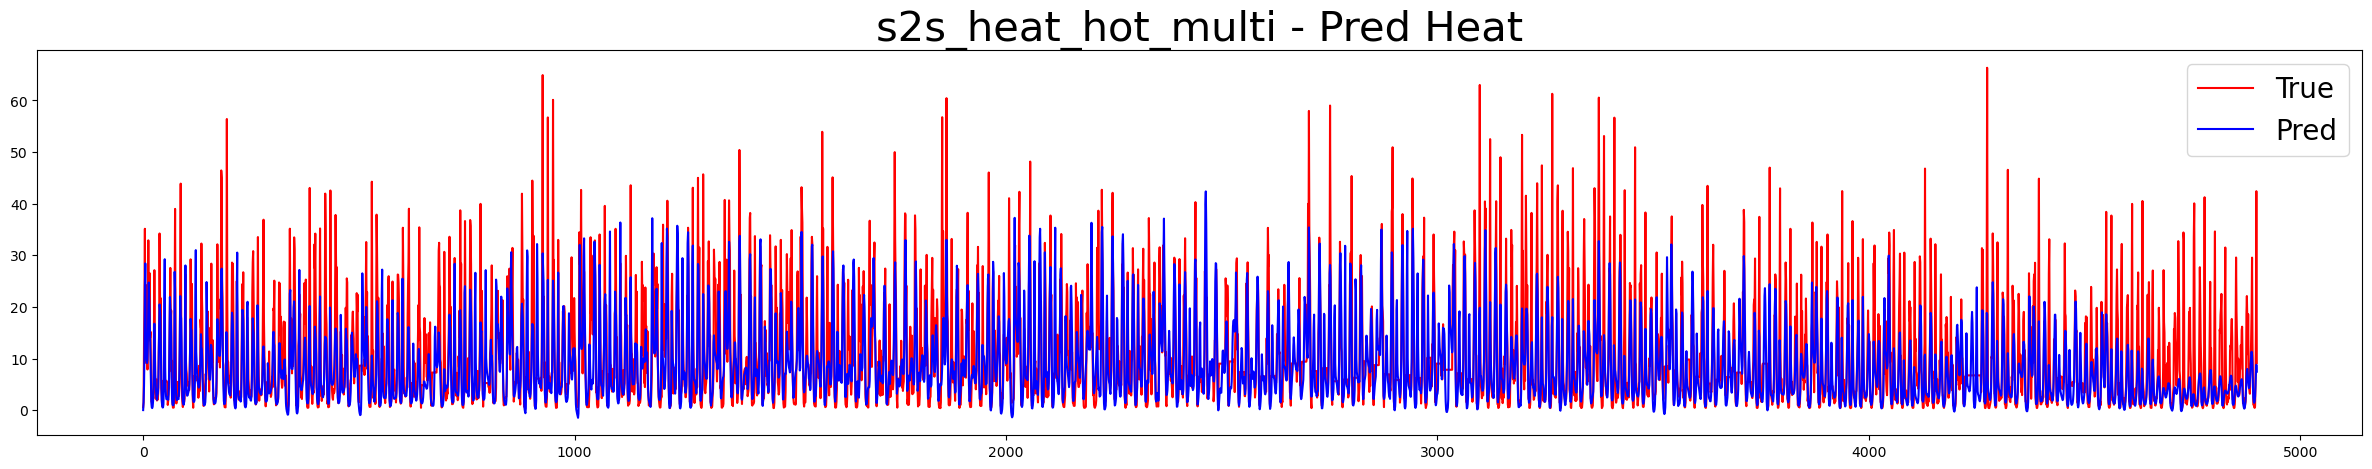

MAE  :  0.1745
MAPE :  11679962209705.547
MSE  :  0.0488
RMSE :  0.221
MBE :  -0.0938
R2   :  0.3498


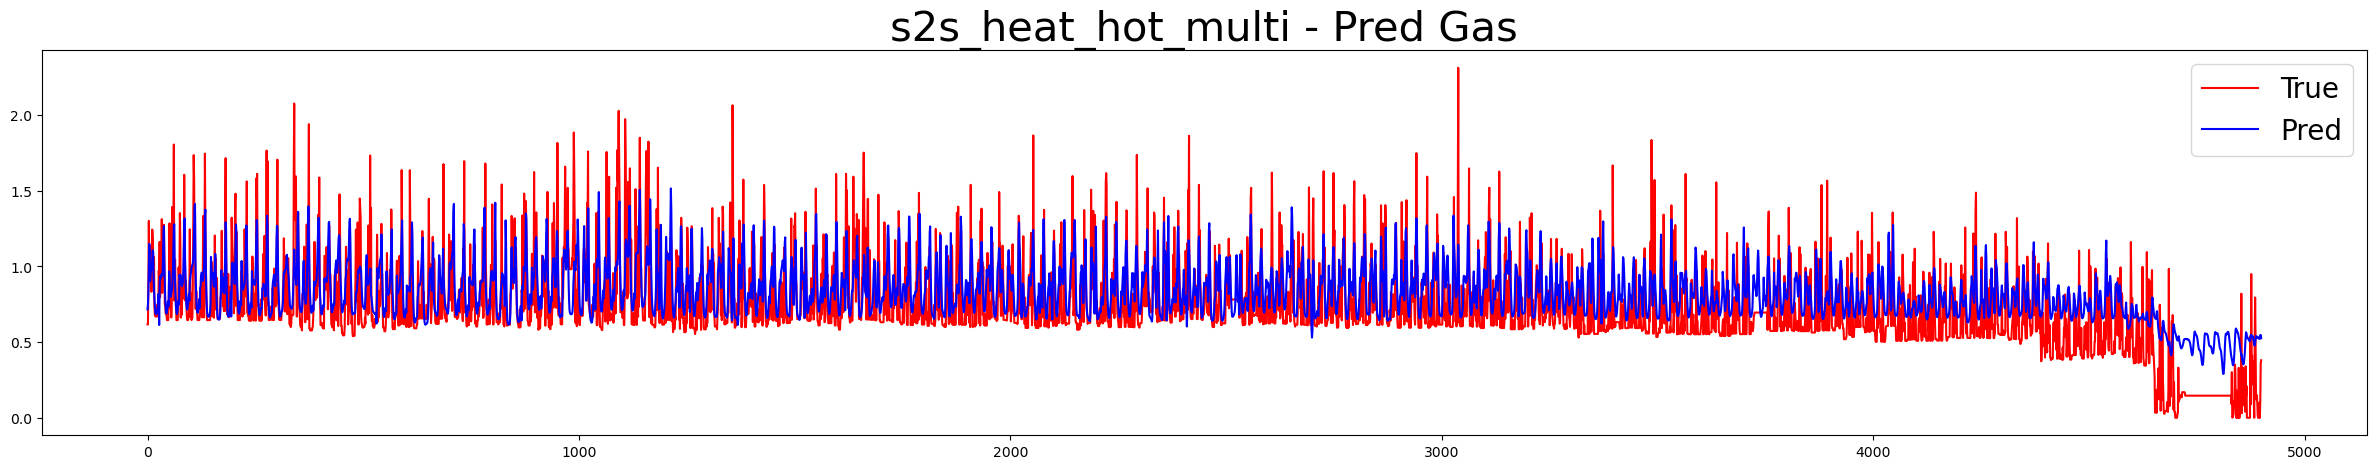

In [ ]:
## Case 02-07 : 2 Domain Multivariate, HEAT/GAS
pred_heat = back_MinMax(back_data.to_numpy()[:, [-3]], model_heat_gas.predict(testx_heat_gas)[:,0])
real_heat = back_MinMax(back_data.to_numpy()[:, [-3]], testy_heat_gas[:,0])

pred_gas = back_MinMax(back_data.to_numpy()[:, [-1]], model_heat_gas.predict(testx_heat_gas)[:,1])
real_gas = back_MinMax(back_data.to_numpy()[:, [-1]], testy_heat_gas[:,1])

str_model = 's2s_heat_hot_multi'
com_Model.model_sk_metrics(real_heat, pred_heat)
com_Model.model_visualization(real_heat, pred_heat, str_model + ' - Pred Heat')

com_Model.model_sk_metrics(real_gas, pred_gas)
com_Model.model_visualization(real_gas, pred_gas, str_model + ' - Pred Gas')

154/154 [==============================] - 1s 6ms/step
MAE  :  0.2231
MAPE :  0.9598
MSE  :  0.1233
RMSE :  0.3511
MBE :  -0.1843
R2   :  -8.7522


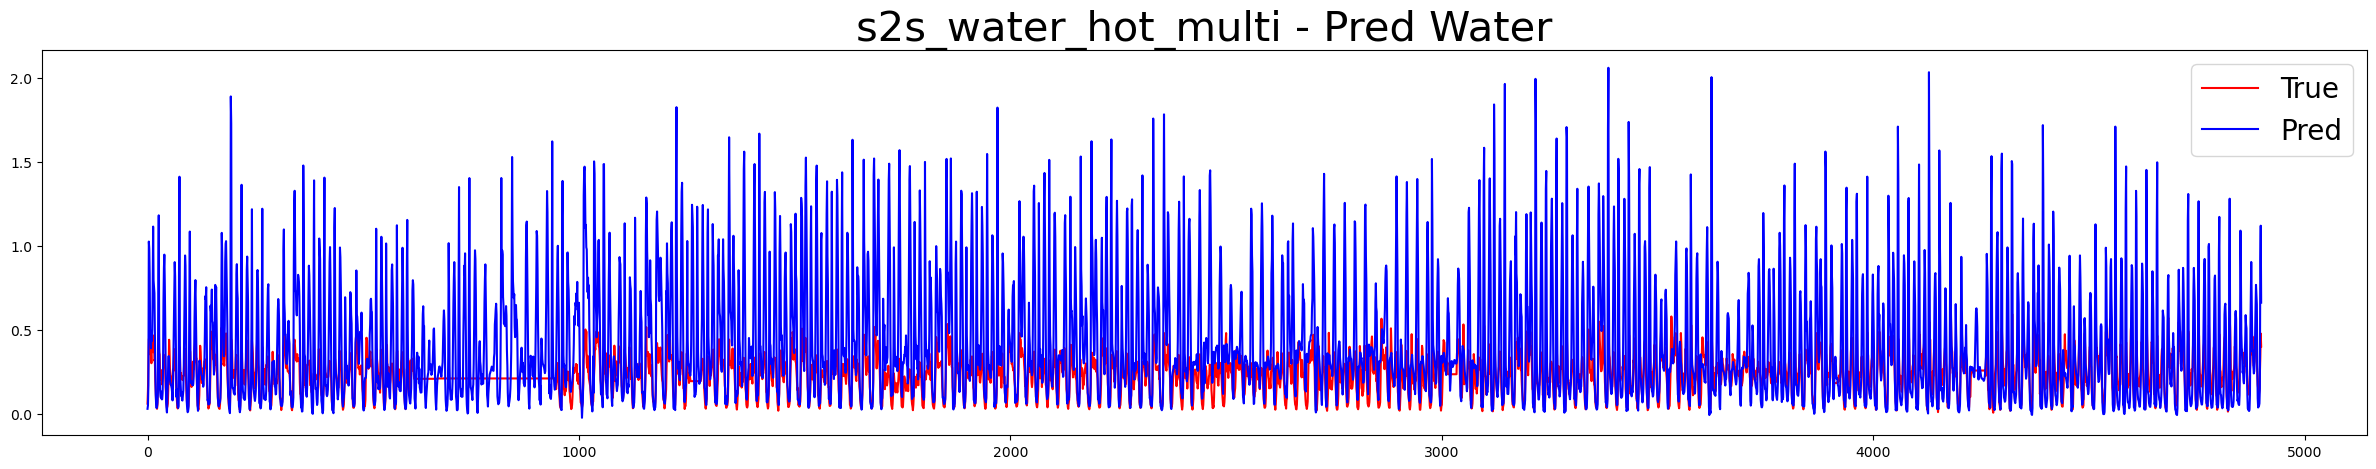

MAE  :  0.0
MAPE :  1.2672
MSE  :  0.0
RMSE :  0.0001
MBE :  0.0
R2   :  0.0223


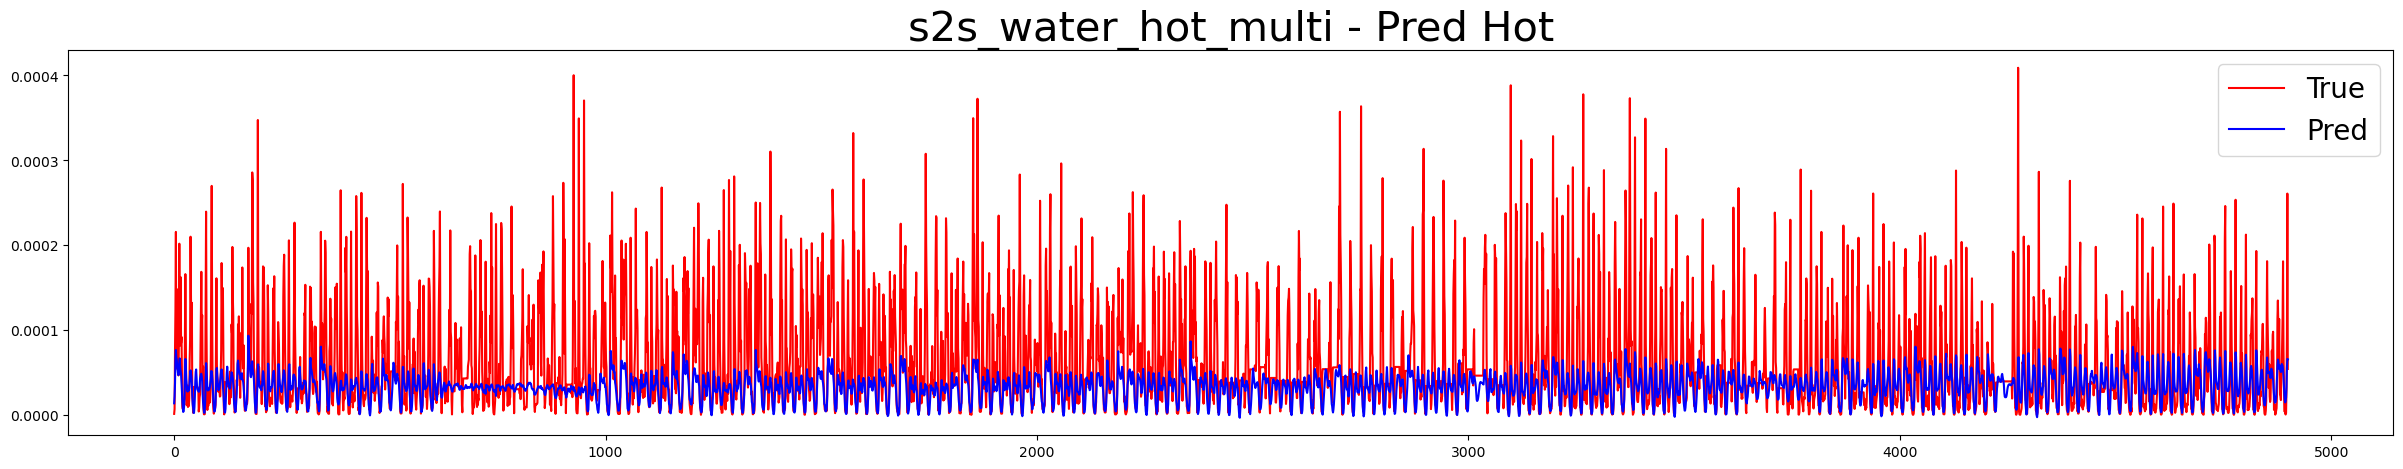

In [ ]:
## Case 02-08 : 2 Domain Multivariate, WATER/HOT
pred_water = back_MinMax(back_data.to_numpy()[:, [-1]], model_water_hot.predict(testx_water_hot)[:,1])
real_water = back_MinMax(back_data.to_numpy()[:, [-1]], testy_water_hot[:,0])

pred_hot = back_MinMax(back_data.to_numpy()[:, [-2]], model_water_hot.predict(testx_water_hot)[:,0])
real_hot = back_MinMax(back_data.to_numpy()[:, [-2]], testy_water_hot[:,1])

str_model = 's2s_water_hot_multi'
com_Model.model_sk_metrics(real_water, pred_water)
com_Model.model_visualization(real_water, pred_water, str_model + ' - Pred Water')

com_Model.model_sk_metrics(real_hot, pred_hot)
com_Model.model_visualization(real_hot, pred_hot, str_model + ' - Pred Hot')

154/154 [==============================] - 1s 6ms/step
MAE  :  0.5679
MAPE :  4.1043
MSE  :  0.3521
RMSE :  0.5933
MBE :  -0.5648
R2   :  -26.8511


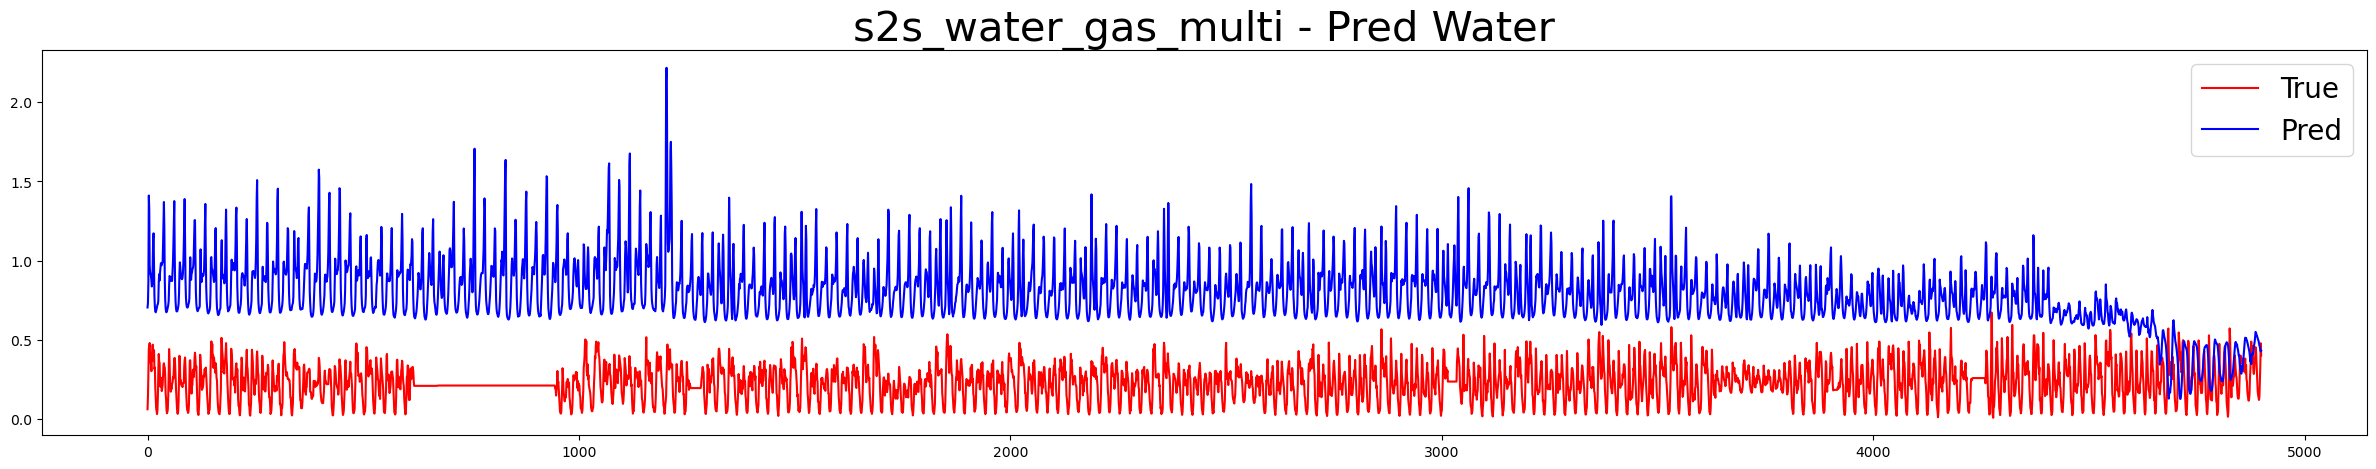

MAE  :  0.0001
MAPE :  1943.5046
MSE  :  0.0
RMSE :  0.0001
MBE :  0.0001
R2   :  -3.3303


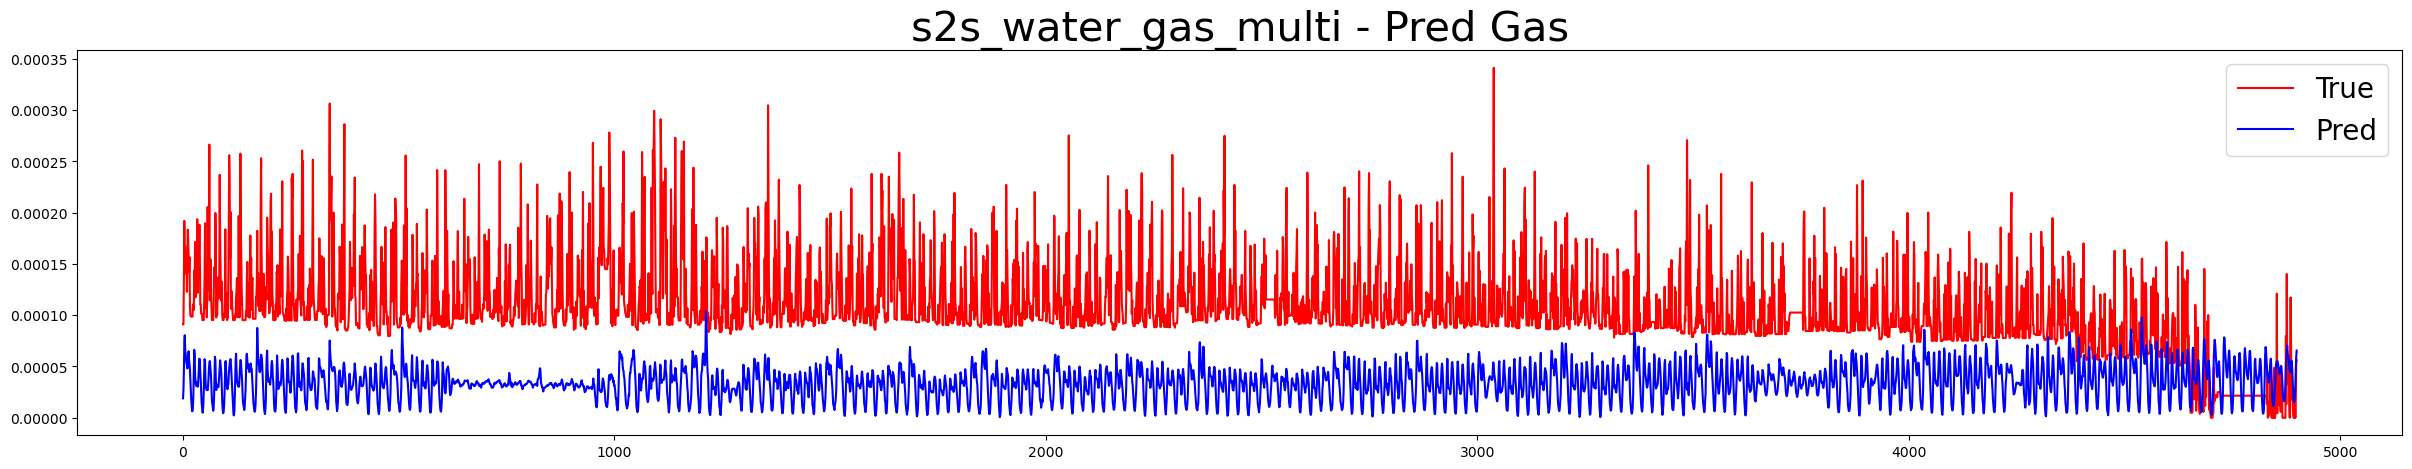

In [ ]:
## Case 02-09 : 2 Domain Multivariate, WATER/GAS
pred_water = back_MinMax(back_data.to_numpy()[:, [-1]], model_water_gas.predict(testx_water_gas)[:,1])
real_water = back_MinMax(back_data.to_numpy()[:, [-1]], testy_water_gas[:,0])

pred_gas = back_MinMax(back_data.to_numpy()[:, [-2]], model_water_gas.predict(testx_water_gas)[:,0])
real_gas = back_MinMax(back_data.to_numpy()[:, [-2]], testy_water_gas[:,1])

str_model = 's2s_water_gas_multi'
com_Model.model_sk_metrics(real_water, pred_water)
com_Model.model_visualization(real_water, pred_water, str_model + ' - Pred Water')

com_Model.model_sk_metrics(real_gas, pred_gas)
com_Model.model_visualization(real_gas, pred_gas, str_model + ' - Pred Gas')

154/154 [==============================] - 1s 6ms/step
MAE  :  0.4841
MAPE :  18.2306
MSE  :  0.2857
RMSE :  0.5345
MBE :  -0.3844
R2   :  -0.6631


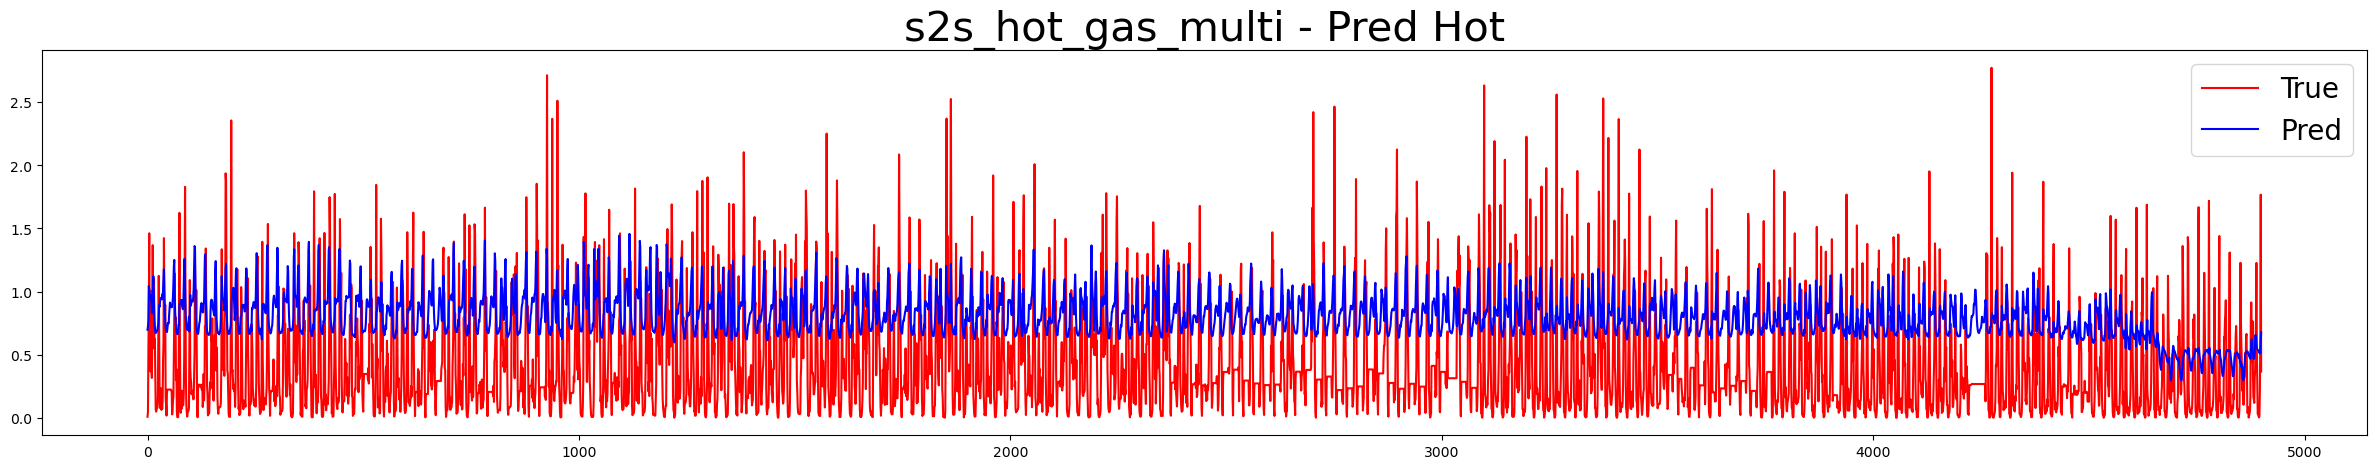

MAE  :  0.0001
MAPE :  897.6297
MSE  :  0.0
RMSE :  0.0001
MBE :  0.0001
R2   :  -2.2706


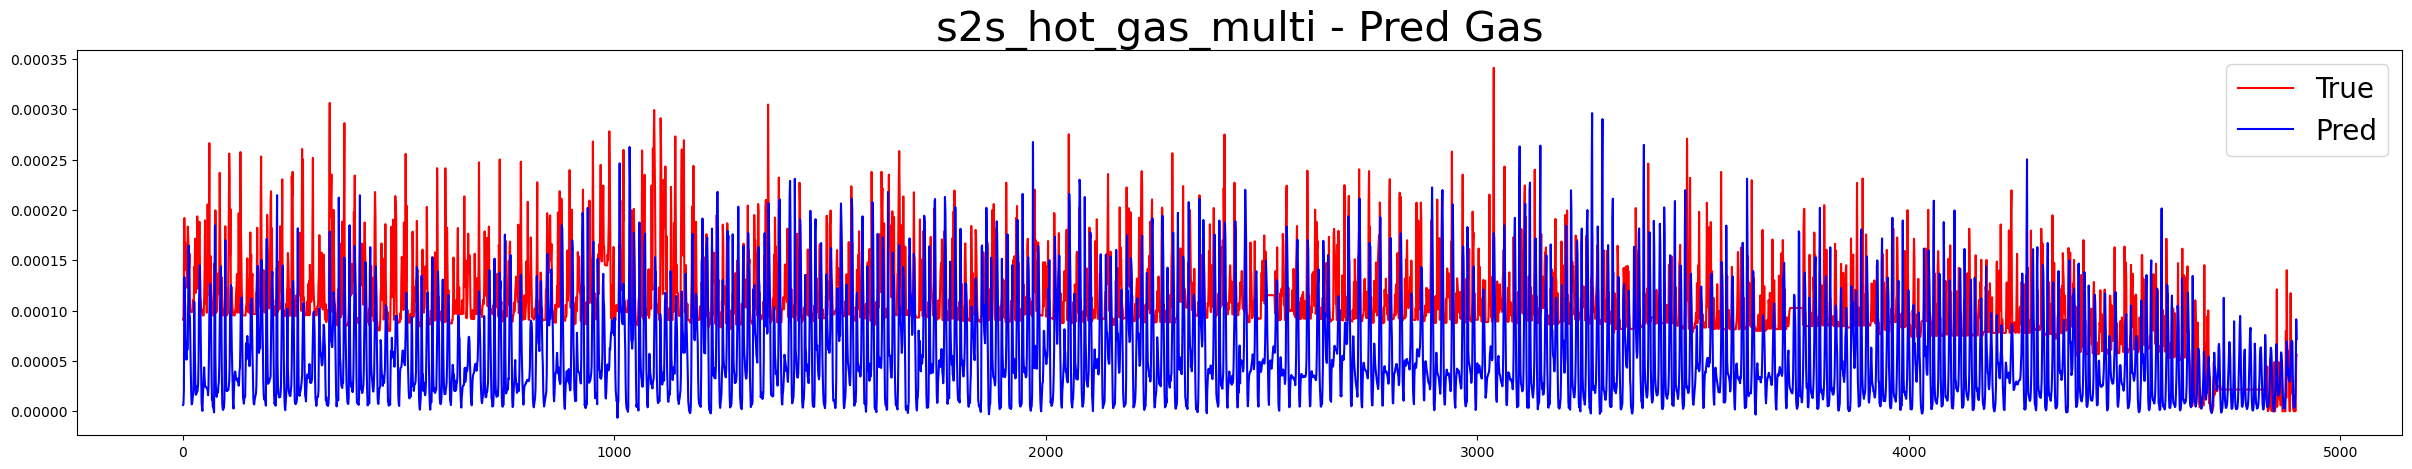

In [ ]:
## Case 02-10 : 2 Domain Multivariate, HOT/GAS
pred_hot = back_MinMax(back_data.to_numpy()[:, [-1]], model_hot_gas.predict(testx_hot_gas)[:,1])
real_hot = back_MinMax(back_data.to_numpy()[:, [-1]], testy_hot_gas[:,0])

pred_gas = back_MinMax(back_data.to_numpy()[:, [-2]], model_hot_gas.predict(testx_hot_gas)[:,0])
real_gas = back_MinMax(back_data.to_numpy()[:, [-2]], testy_hot_gas[:,1])

str_model = 's2s_hot_gas_multi'
com_Model.model_sk_metrics(real_hot, pred_hot)
com_Model.model_visualization(real_hot, pred_hot, str_model + ' - Pred Hot')

com_Model.model_sk_metrics(real_gas, pred_gas)
com_Model.model_visualization(real_gas, pred_gas, str_model + ' - Pred Gas')